In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [4]:
torch.cuda.is_available()


False

In [5]:
!pwd

/Users/niveshia/Desktop/pythonFiles/misc/pytorch/pytorch_start


In [6]:
pic_ = Image.open("pic_1.jpg")


In [7]:
pic_array = np.asarray(pic_)
pic_array.shape


(456, 624, 3)

In [8]:
img_ten = torch.from_numpy(pic_array)
img_ten = img_ten.permute(2,0,1)
img_ten.shape


torch.Size([3, 456, 624])

In [10]:
import torch.nn.functional as F


## MIRROR TRANSFORMATION

In [53]:
def flip(i=[0]):

  pic_array = np.asarray(Image.open("pic_1.jpg"))
  img_ten = torch.from_numpy(pic_array).permute(2,0,1).unsqueeze(0)

  I = torch.eye(3)
  for ind in i:
    I[ind,ind] *= -1

  affine = F.affine_grid(I[:2].unsqueeze(0).to(torch.float32), img_ten.size())

  affine = affine.to(torch.float32)
  img_ten = img_ten.to(torch.float32)

  check = F.grid_sample(img_ten, affine, padding_mode="border").to("cpu")
  return check.squeeze(0).permute(1,2,0).to(torch.long)



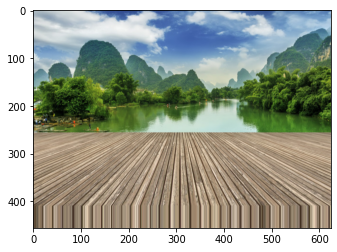

In [51]:
plt.imshow(cheeck.squeeze(0).permute(1,2,0).to(torch.long))


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


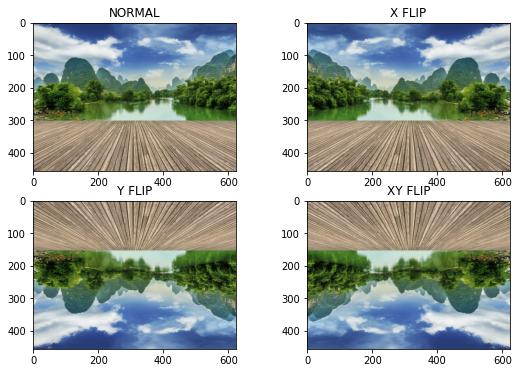

In [64]:
ax = []
fig = plt.figure(figsize=(9, 6))

columns = 2
rows = 2

ax.append( fig.add_subplot(rows, columns, 1))
ax[-1].set_title("NORMAL")  # set title
plt.imshow(flip(i=[]))

ax.append( fig.add_subplot(rows, columns, 2))
ax[-1].set_title("X FLIP")  # set title
plt.imshow(flip(i=[0]))

ax.append( fig.add_subplot(rows, columns, 3))
ax[-1].set_title("Y FLIP")  # set title
plt.imshow(flip(i=[1]))

ax.append( fig.add_subplot(rows, columns, 4))
ax[-1].set_title("XY FLIP")  # set title
plt.imshow(flip(i=[0,1]))


## OFFSET

In [60]:
def offset(i=[0,1]):

  pic_array = np.asarray(Image.open("pic_1.jpg"))
  img_ten = torch.from_numpy(pic_array).permute(2,0,1).unsqueeze(0)

  I = torch.eye(3)
  for ind in i:
    I[ind[0],2] = ind[1]

  affine = F.affine_grid(I[:2].unsqueeze(0).to(torch.float32), img_ten.size())

  affine = affine.to(torch.float32)
  img_ten = img_ten.to(torch.float32)

  check = F.grid_sample(img_ten, affine, padding_mode="border").to("cpu")
  return check.squeeze(0).permute(1,2,0).to(torch.long)



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


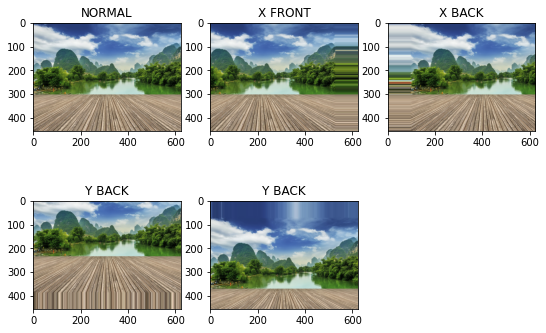

In [63]:
ax = []
fig = plt.figure(figsize=(9, 6))

columns = 3
rows = 2

ax.append( fig.add_subplot(rows, columns, 1))
ax[-1].set_title("NORMAL")  # set title
plt.imshow(offset(i=[]))

ax.append( fig.add_subplot(rows, columns, 2))
ax[-1].set_title("X FRONT")  # set title
plt.imshow(offset(i=[[0,0.3]]))

ax.append( fig.add_subplot(rows, columns, 3))
ax[-1].set_title("X BACK")  # set title
plt.imshow(offset(i=[[0,-0.3]]))

ax.append( fig.add_subplot(rows, columns, 4))
ax[-1].set_title("Y BACK")  # set title
plt.imshow(offset(i=[[1,0.3]]))


ax.append( fig.add_subplot(rows, columns, 5))
ax[-1].set_title("Y BACK")  # set title
plt.imshow(offset(i=[[1,-0.3]]))


## AUGMENTATION

In [14]:
def augment(i=[0,1]):

  pic_array = np.asarray(Image.open("pic_1.jpg"))
  img_ten = torch.from_numpy(pic_array).permute(2,0,1).unsqueeze(0)

  I = torch.eye(3)
  for ind in i:
    I[ind[0],ind[0]] *= ind[1]

  affine = F.affine_grid(I[:2].unsqueeze(0).to(torch.float32), img_ten.size())

  affine = affine.to(torch.float32)
  img_ten = img_ten.to(torch.float32)

  check = F.grid_sample(img_ten, affine, padding_mode="border").to("cpu")
  return check.squeeze(0).permute(1,2,0).to(torch.long)



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


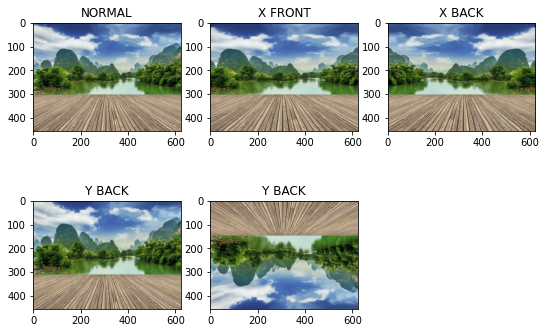

In [72]:

ax = []
fig = plt.figure(figsize=(9, 6))

columns = 3
rows = 2

ax.append( fig.add_subplot(rows, columns, 1))
ax[-1].set_title("NORMAL")  # set title
plt.imshow(augment(i=[]))

ax.append( fig.add_subplot(rows, columns, 2))
ax[-1].set_title("X FRONT")  # set title
plt.imshow(augment(i=[[0,0.8]]))

ax.append( fig.add_subplot(rows, columns, 3))
ax[-1].set_title("X BACK")  # set title
plt.imshow(augment(i=[[0,-0.8]]))

ax.append( fig.add_subplot(rows, columns, 4))
ax[-1].set_title("Y BACK")  # set title
plt.imshow(augment(i=[[1,0.9]]))


ax.append( fig.add_subplot(rows, columns, 5))
ax[-1].set_title("Y BACK")  # set title
plt.imshow(augment(i=[[1,-0.9]]))


## ROTATING

In [13]:
def rotate(i=45):

  pic_array = np.asarray(Image.open("pic_1.jpg"))
  img_ten = torch.from_numpy(pic_array).permute(2,0,1).unsqueeze(0)

  radians = math.radians(i)

  s = math.sin(radians)
  c = math.cos(radians)

  I = torch.eye(3)

  rotation_t = torch.tensor([
                    [c, -s, 0],
                    [s, c, 0],
                    [0, 0, 1]])
  
  I @= rotation_t
  
  affine = F.affine_grid(I[:2].unsqueeze(0).to(torch.float32), img_ten.size())

  affine = affine.to(torch.float32)
  img_ten = img_ten.to(torch.float32)

  check = F.grid_sample(img_ten, affine, padding_mode="border").to("cpu")
  return check.squeeze(0).permute(1,2,0).to(torch.long)



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


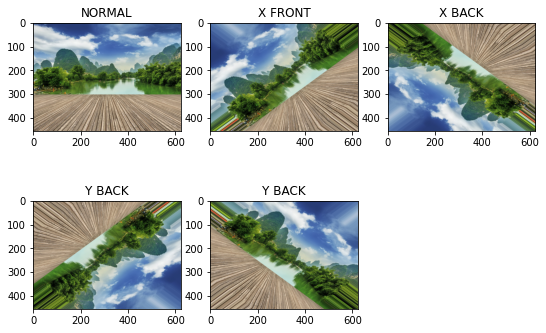

In [84]:

ax = []
fig = plt.figure(figsize=(9, 6))

columns = 3
rows = 2

ax.append( fig.add_subplot(rows, columns, 1))
ax[-1].set_title("NORMAL")  # set title
plt.imshow(augment(i=[]))

ax.append( fig.add_subplot(rows, columns, 2))
ax[-1].set_title("X FRONT")  # set title
plt.imshow(rotate(45))

ax.append( fig.add_subplot(rows, columns, 3))
ax[-1].set_title("X BACK")  # set title
plt.imshow(rotate(135))

ax.append( fig.add_subplot(rows, columns, 4))
ax[-1].set_title("Y BACK")  # set title
plt.imshow(rotate(225))


ax.append( fig.add_subplot(rows, columns, 5))
ax[-1].set_title("Y BACK")  # set title
plt.imshow(rotate(315))


## ADDING NOISE

In [23]:
def noise():

  pic_array = np.asarray(Image.open("pic_1.jpg"))
  augmented_chunk = torch.from_numpy(pic_array).permute(2,0,1).to(device="cpu").to(torch.float32)

  noise_t = torch.randn_like(augmented_chunk)
  noise_t *= 150

  augmented_chunk += noise_t

  return augmented_chunk.permute(1,2,0).to(torch.long)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


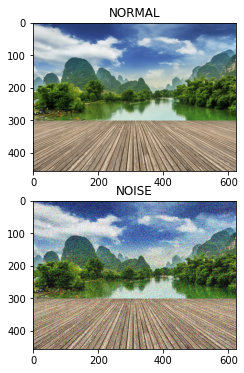

In [24]:
ax = []
fig = plt.figure(figsize=(9, 6))

columns = 1
rows = 2

ax.append( fig.add_subplot(rows, columns, 1))
ax[-1].set_title("NORMAL")  # set title
plt.imshow(augment(i=[]))

ax.append( fig.add_subplot(rows, columns, 2))
ax[-1].set_title("NOISE")  # set title
plt.imshow(noise())





In [92]:

torch.randn_like(torch.eye(4))



tensor([[-1.5101,  0.7766, -0.9666,  0.1916],
        [ 0.0408,  0.8817,  1.0958, -0.0057],
        [-0.1822,  0.0397,  0.0076,  0.1872],
        [ 0.0843, -0.2063, -0.6023, -0.0072]])